In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

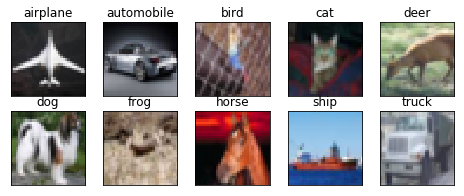

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))

model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512))#remove

model.add(Activation('relu'))
model.add(Dropout(0.5))#miss place doupout

model.add(Dense(256))#remove
model.add(Activation('relu'))

model.add(Dropout(0.5))#miss place doupout
model.add(Dense(num_classes, activation='softmax'))#remove
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 11s 29ms/step - loss: 1.8554 - acc: 0.2938 - val_loss: 1.4551 - val_acc: 0.4570
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3554 - acc: 0.5061 - val_loss: 1.1559 - val_acc: 0.5875
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1281 - acc: 0.6031 - val_loss: 0.9457 - val_acc: 0.6657
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9911 - acc: 0.6515 - val_loss: 0.8647 - val_acc: 0.7016
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8996 - acc: 0.6878 - val_loss: 0.7764 - val_acc: 0.7288
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8234 - acc: 0.7167 - val_loss: 0.8203 - val_acc: 0.7231
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7683 - acc: 0.7347 - val_loss: 0.6938 - val_acc: 0.7642
Epoch 8/100
390/390 [==============================] - 9s 23m

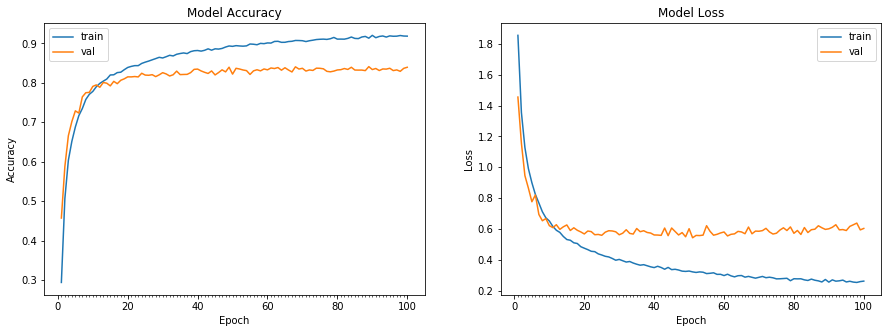

Accuracy on test data is: 83.93


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Want to beat acc: 0.927 val_acc: 82.89

In [0]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3,border_mode='same')) #32x32x48
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # 16x16x48
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, border_mode='same')) #16x15x96
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#8x8x96
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, border_mode='same'))#8x8x64
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3,border_mode='same'))#8x8x32
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(16, 3, 3,border_mode='same'))#8x8x16
model.add(Activation('relu'))
model.add(Dropout(0.25))

# model.add(Convolution2D(10, 3, 3, border_mode='same'))#8x8x10
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

#taking 10 channel out of 100
model.add(Convolution2D(10, 8))#1x1x10

model.add(Convolution2D(10, 1, 1))#1x1x10

# model.add(Convolution2D(10, 8))#1x1x10

model.add(Flatten())#10
model.add(Activation('softmax'))


model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` c

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_88 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_89 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 16, 16, 128)       147584    
__________

Epoch 1/100
  3/872 [..............................] - ETA: 46s - loss: 2.2862 - acc: 0.1395

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=872, epochs=100)`
  if sys.path[0] == '':


872/872 [==============================] - 34s 39ms/step - loss: 2.1382 - acc: 0.1926 - val_loss: 2.1088 - val_acc: 0.2177
Epoch 2/100
872/872 [==============================] - 33s 38ms/step - loss: 1.9343 - acc: 0.2799 - val_loss: 1.8342 - val_acc: 0.3240
Epoch 3/100
872/872 [==============================] - 34s 38ms/step - loss: 1.7770 - acc: 0.3397 - val_loss: 1.6365 - val_acc: 0.3960
Epoch 4/100
872/872 [==============================] - 33s 38ms/step - loss: 1.6359 - acc: 0.3959 - val_loss: 1.5385 - val_acc: 0.4369
Epoch 5/100
872/872 [==============================] - 33s 38ms/step - loss: 1.5255 - acc: 0.4377 - val_loss: 1.4229 - val_acc: 0.4876
Epoch 6/100
872/872 [==============================] - 33s 38ms/step - loss: 1.4376 - acc: 0.4739 - val_loss: 1.3304 - val_acc: 0.5098
Epoch 7/100
872/872 [==============================] - 33s 38ms/step - loss: 1.3561 - acc: 0.5056 - val_loss: 1.2589 - val_acc: 0.5482
Epoch 8/100
872/872 [==============================] - 33s 38ms/ste

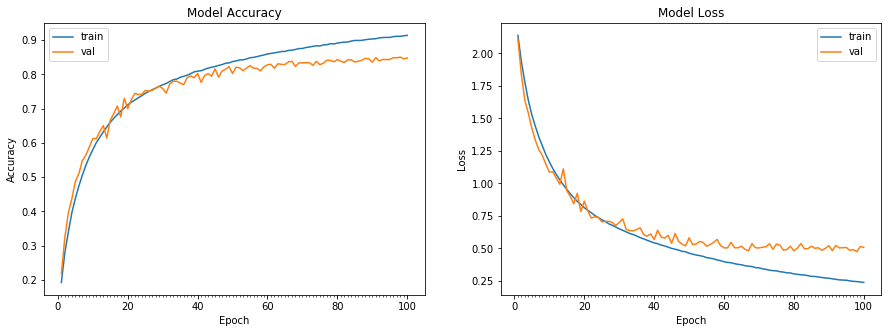

Accuracy on test data is: 84.77


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = 3*train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#after reaching val_acc=80 & test_acc = 80 model is little overfiting #8x8x10 added dropout.